In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

#NOTE: Got the wrong bank-full csv (never uploaded)
df = pd.read_csv("bank-full.csv")

In [2]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='age', ylabel='Count'>

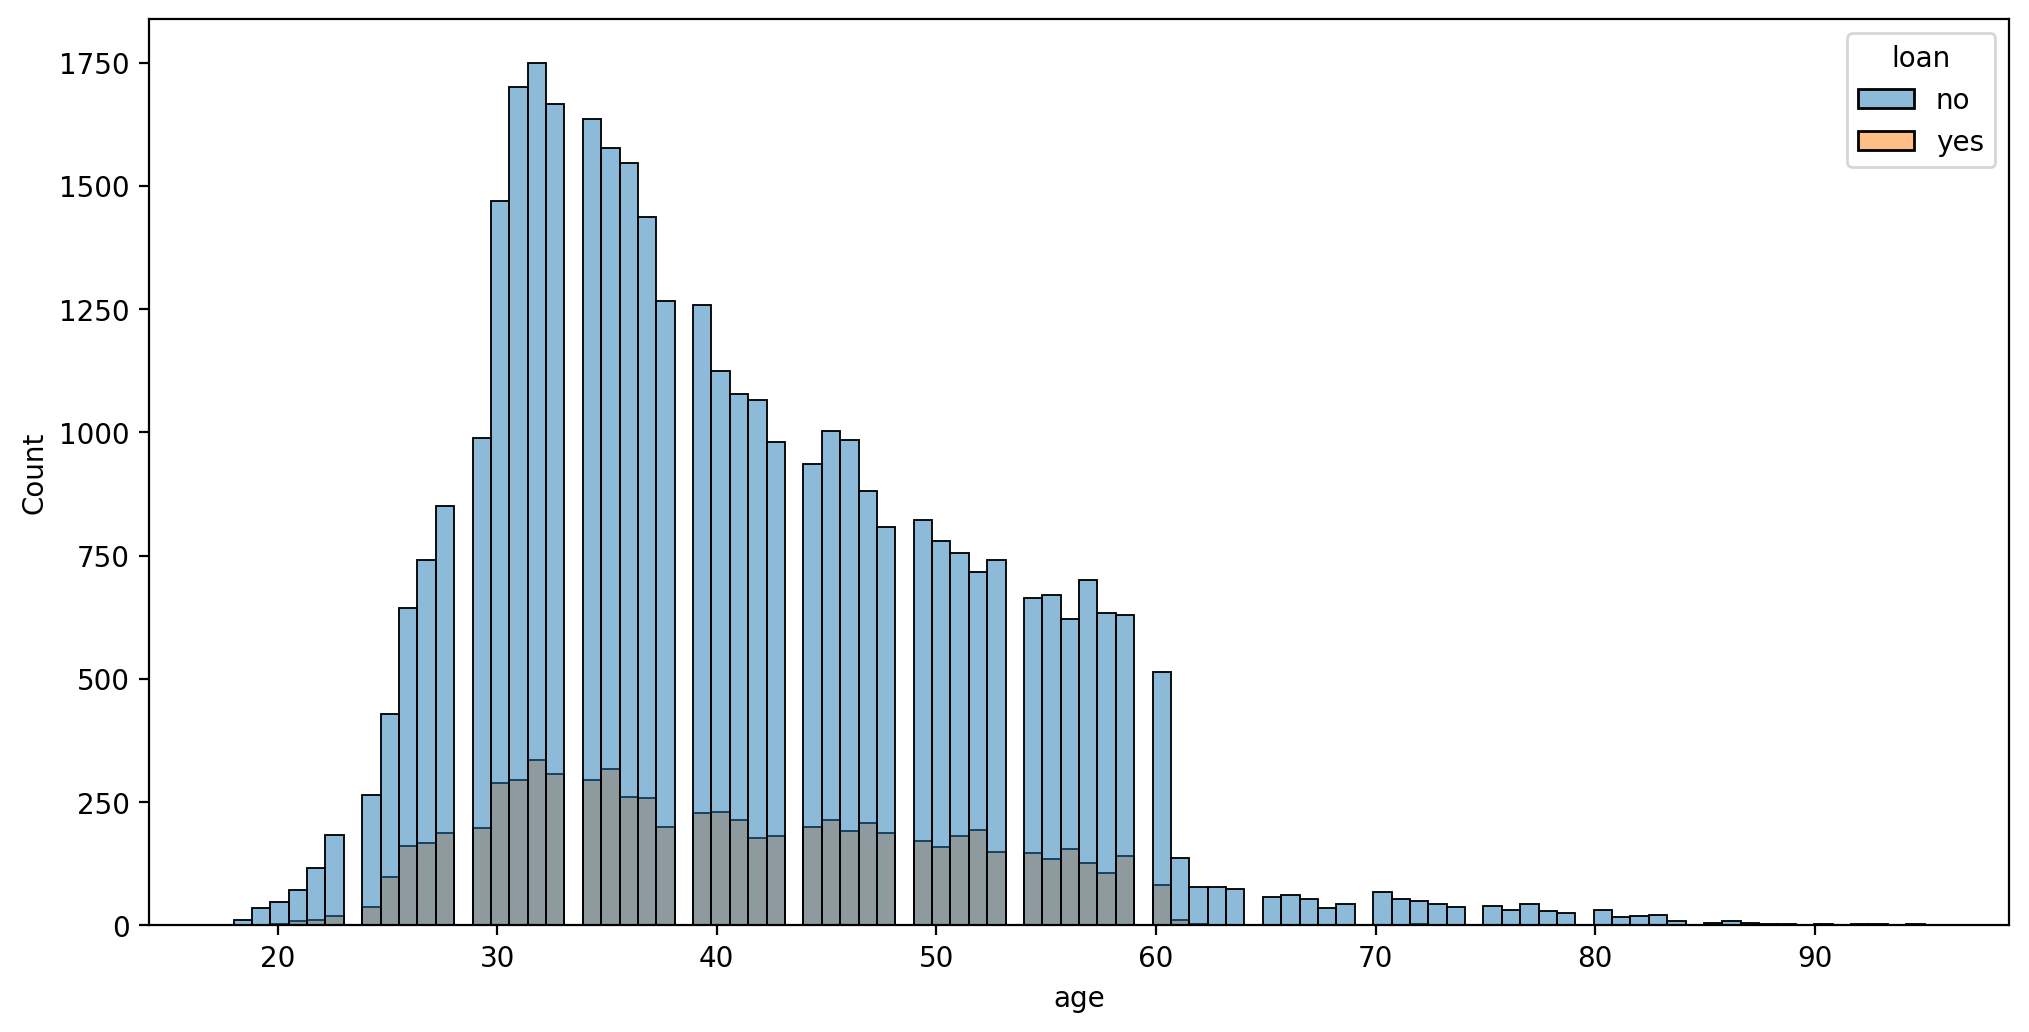

In [4]:
plt.figure(figsize = (12,6), dpi=200)
sns.histplot(data=df, x="age", hue = "loan")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

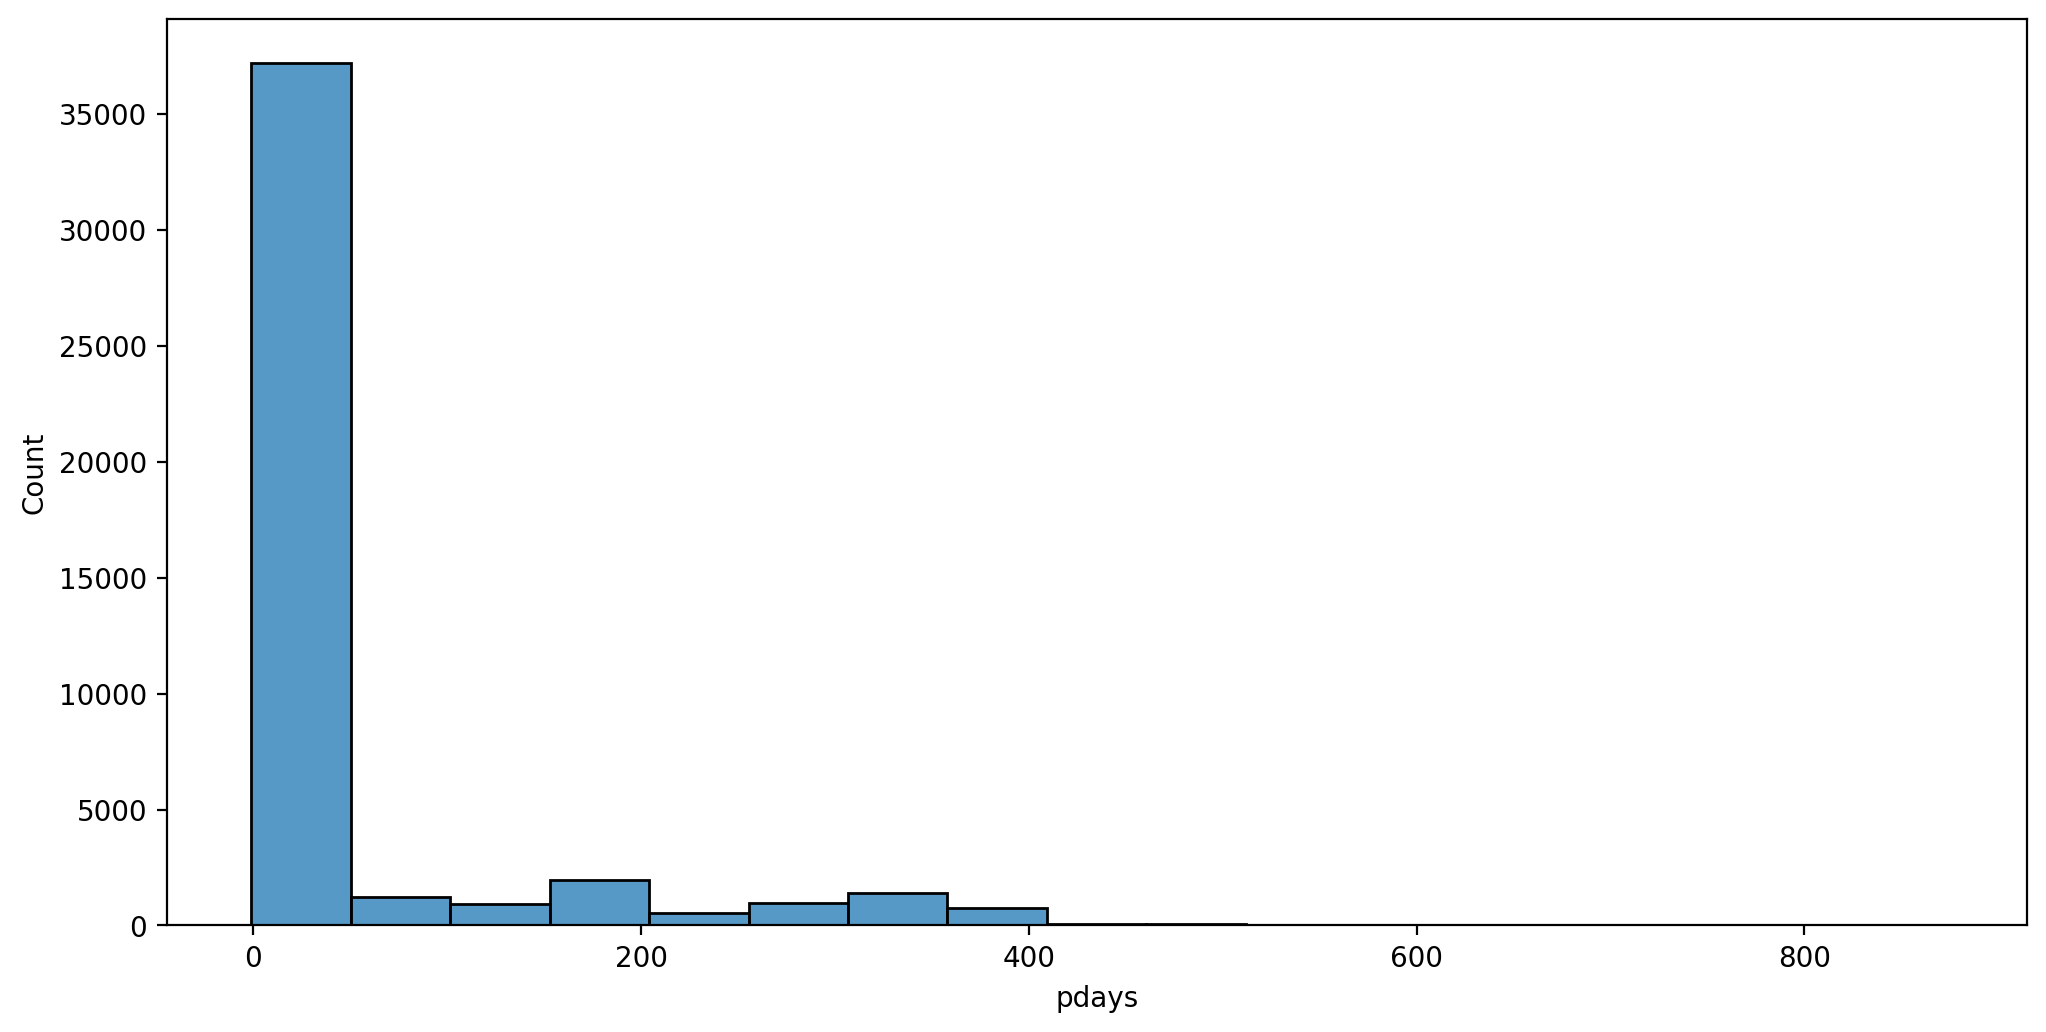

In [5]:
plt.figure(figsize = (12,6), dpi=200)
sns.histplot(data=df, x="pdays")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

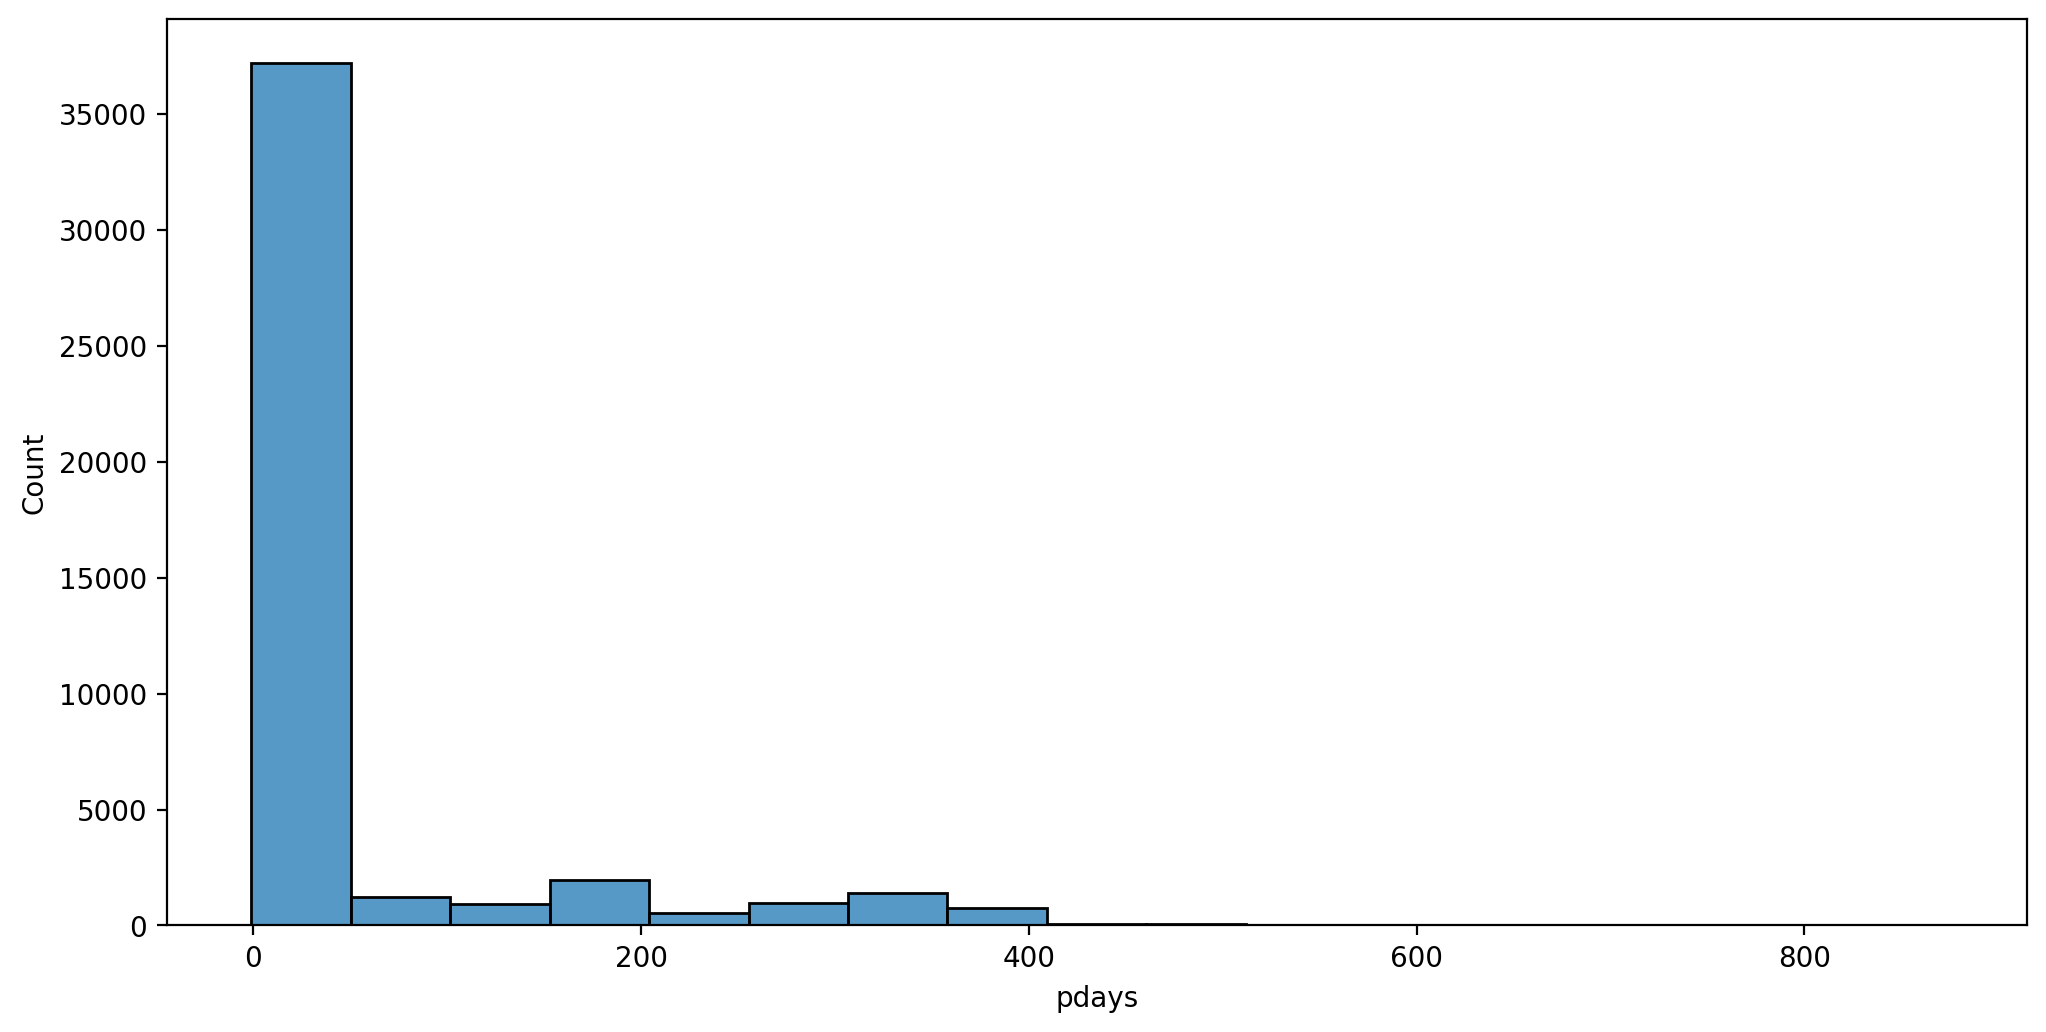

In [6]:
plt.figure(figsize = (12,6), dpi=200)
sns.histplot(data=df[df["pdays"]!=999],x="pdays")

(0.0, 2000.0)

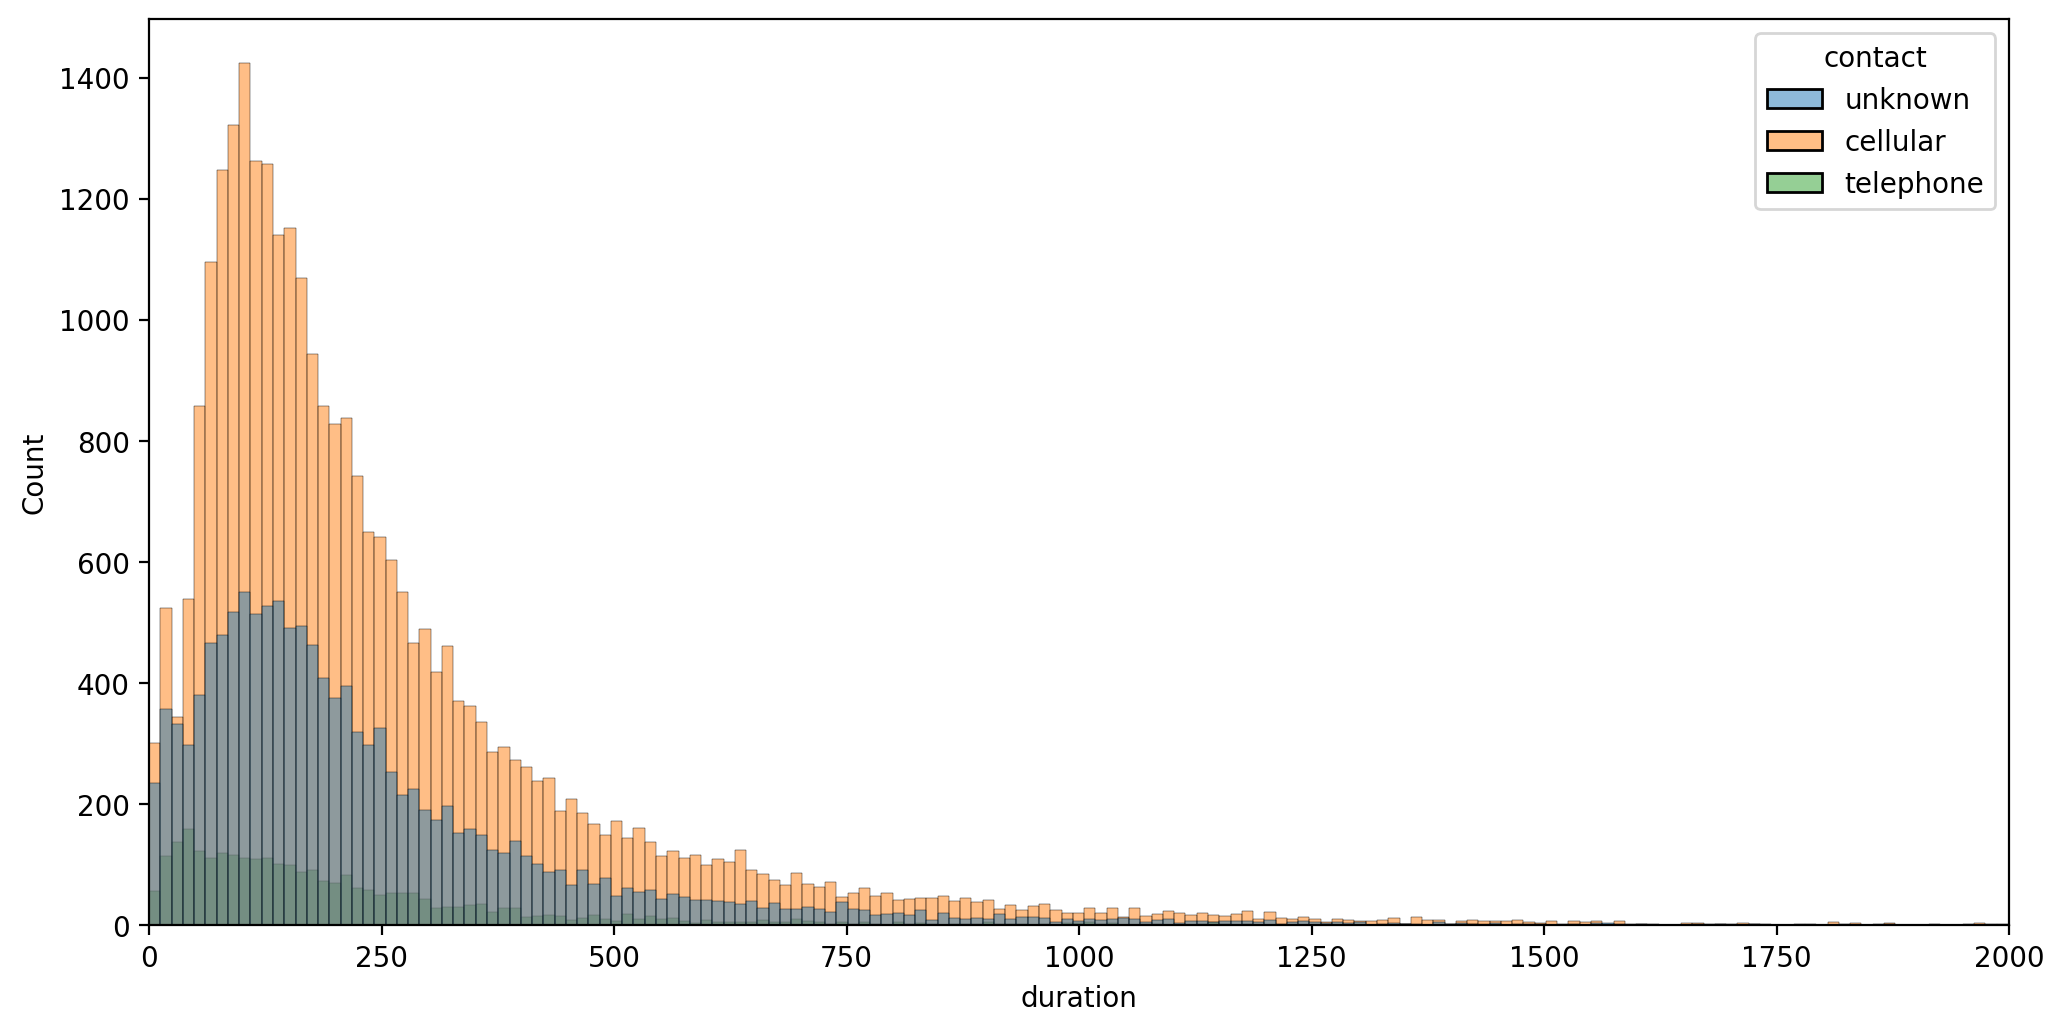

In [7]:
plt.figure(figsize = (12, 6), dpi=200)
sns.histplot(data = df, x = "duration", hue = "contact")
plt.xlim(0, 2000)

<AxesSubplot:xlabel='contact', ylabel='count'>

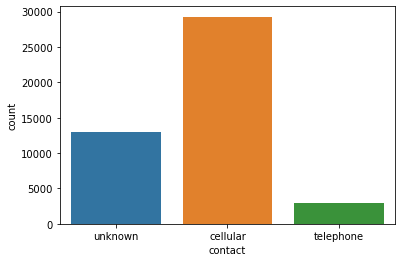

In [8]:
sns.countplot(data = df, x = "contact")

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


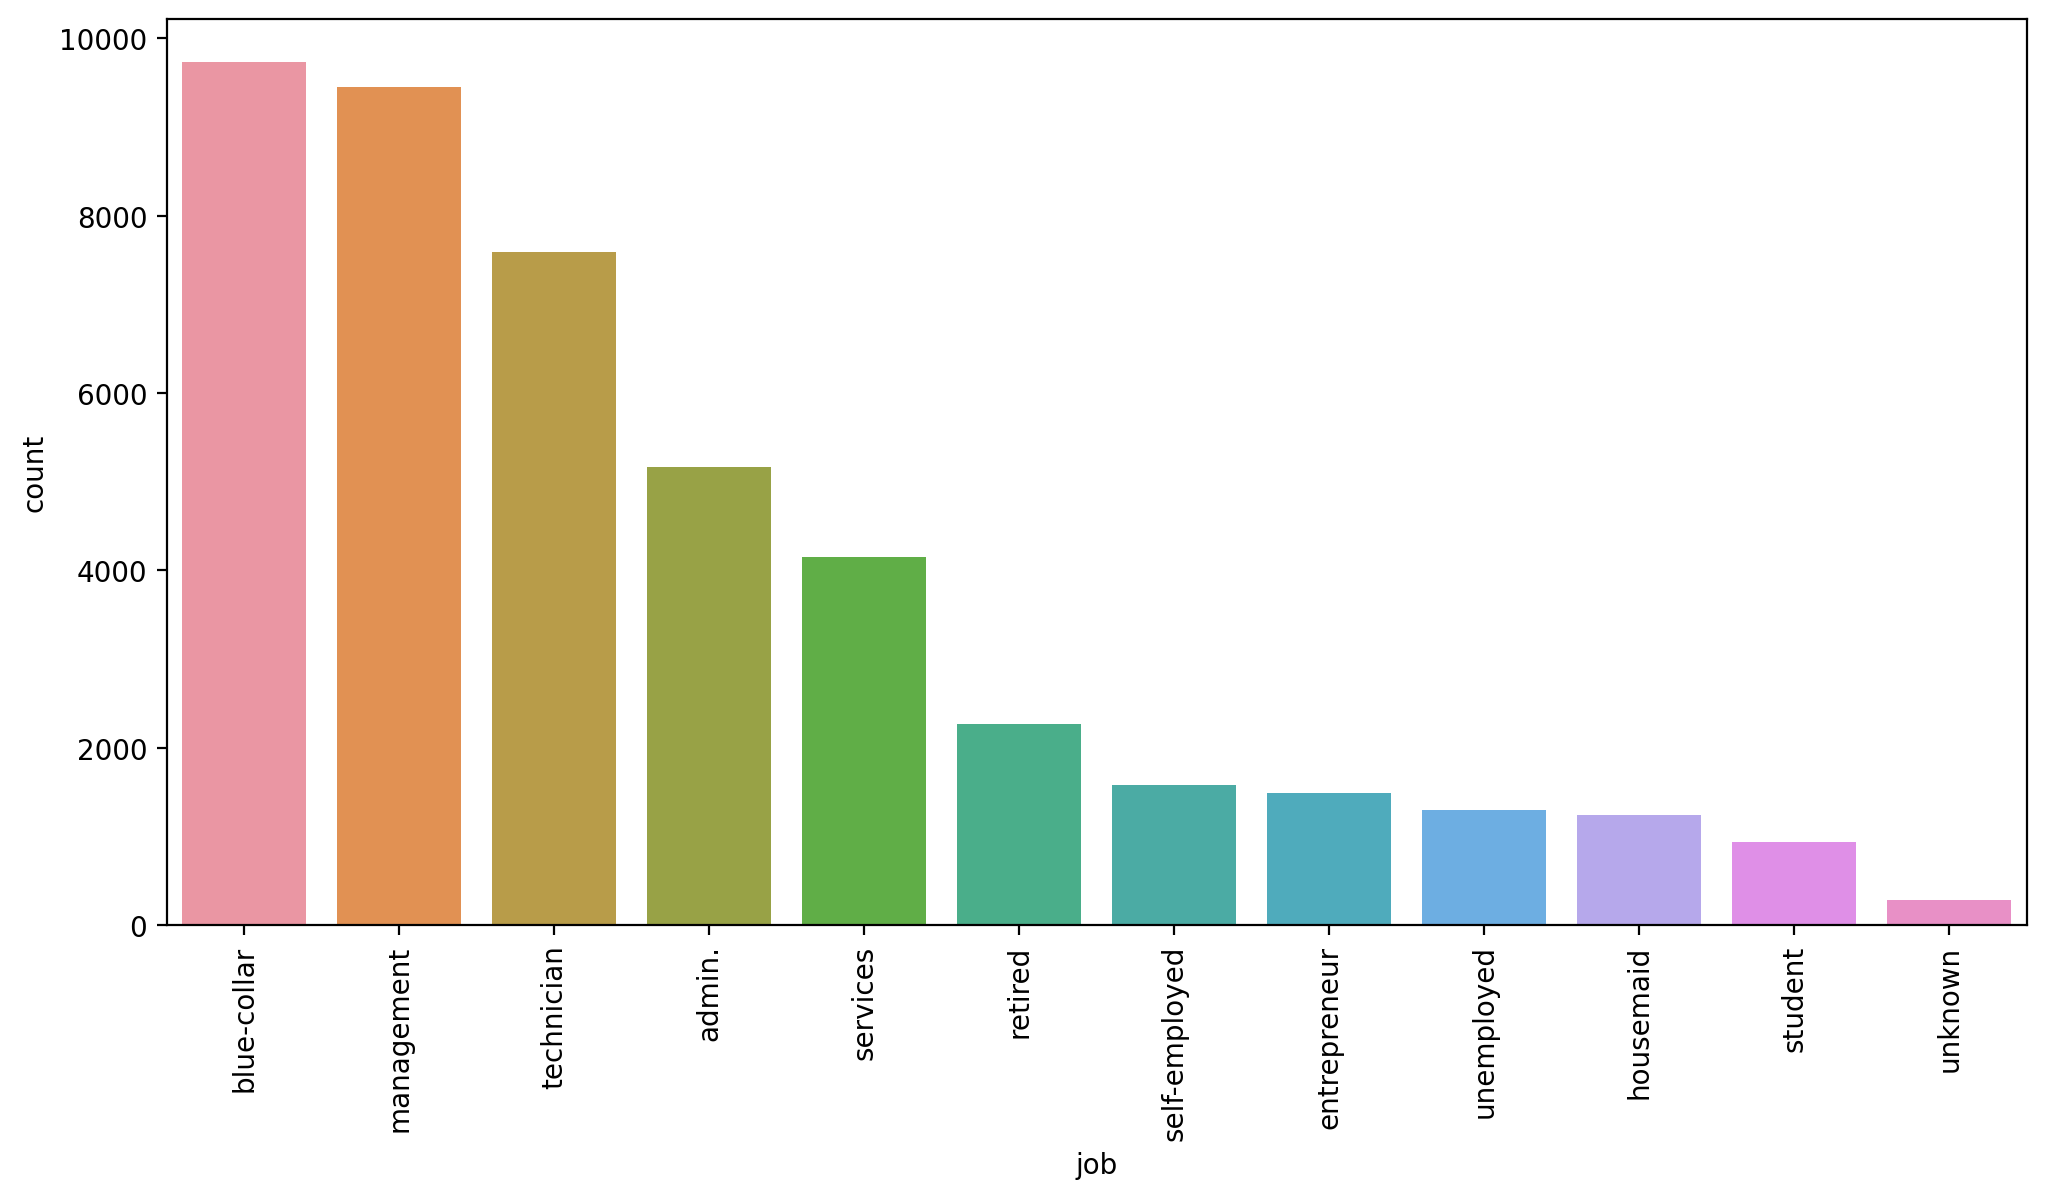

In [10]:
plt.figure(figsize = (12,6), dpi = 200)
#https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data = df, x = "job", order = df["job"].value_counts().index)
plt.xticks(rotation = 90);

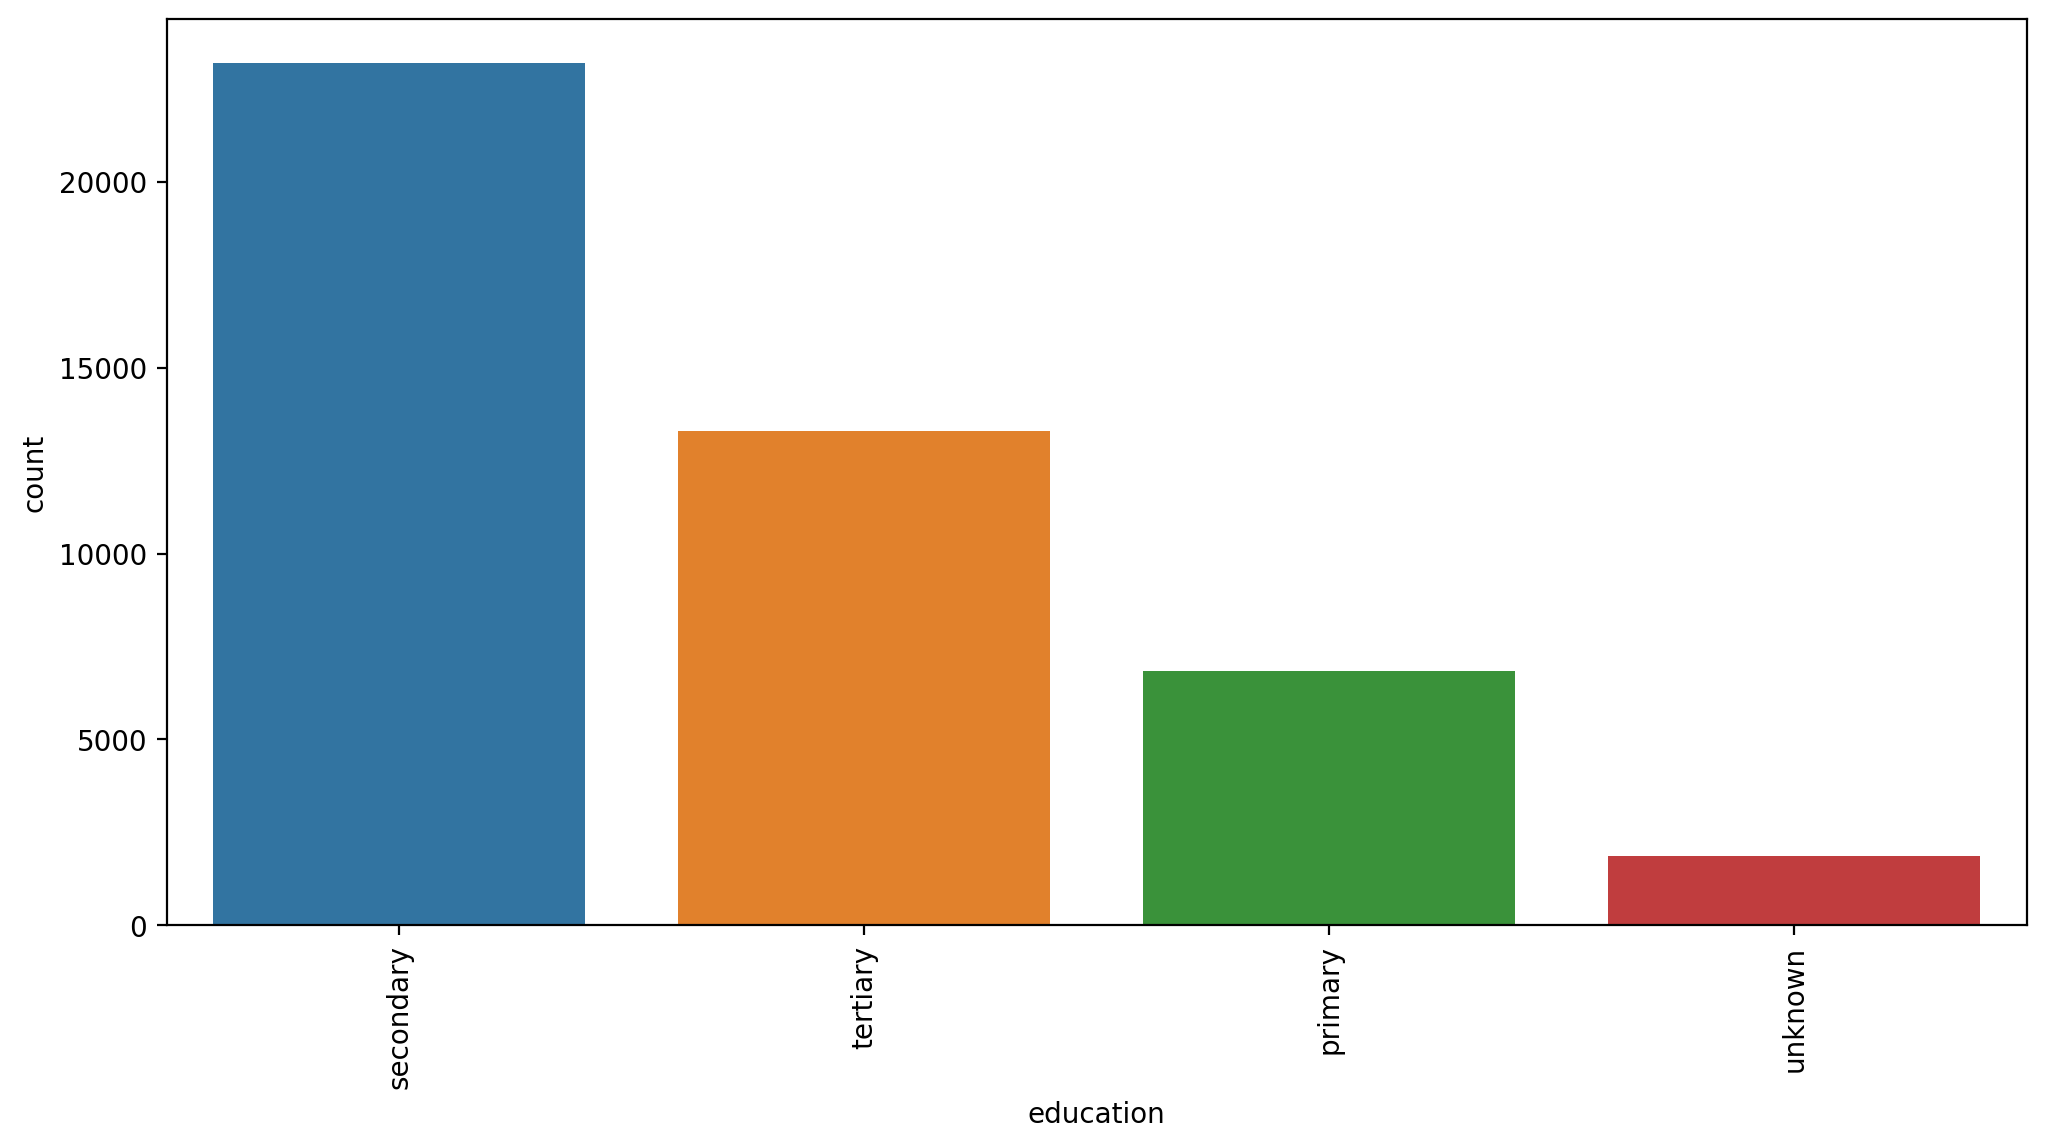

In [11]:
plt.figure(figsize = (12,6), dpi = 200)
#https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data = df, x = "education", order = df["education"].value_counts().index)
plt.xticks(rotation = 90);

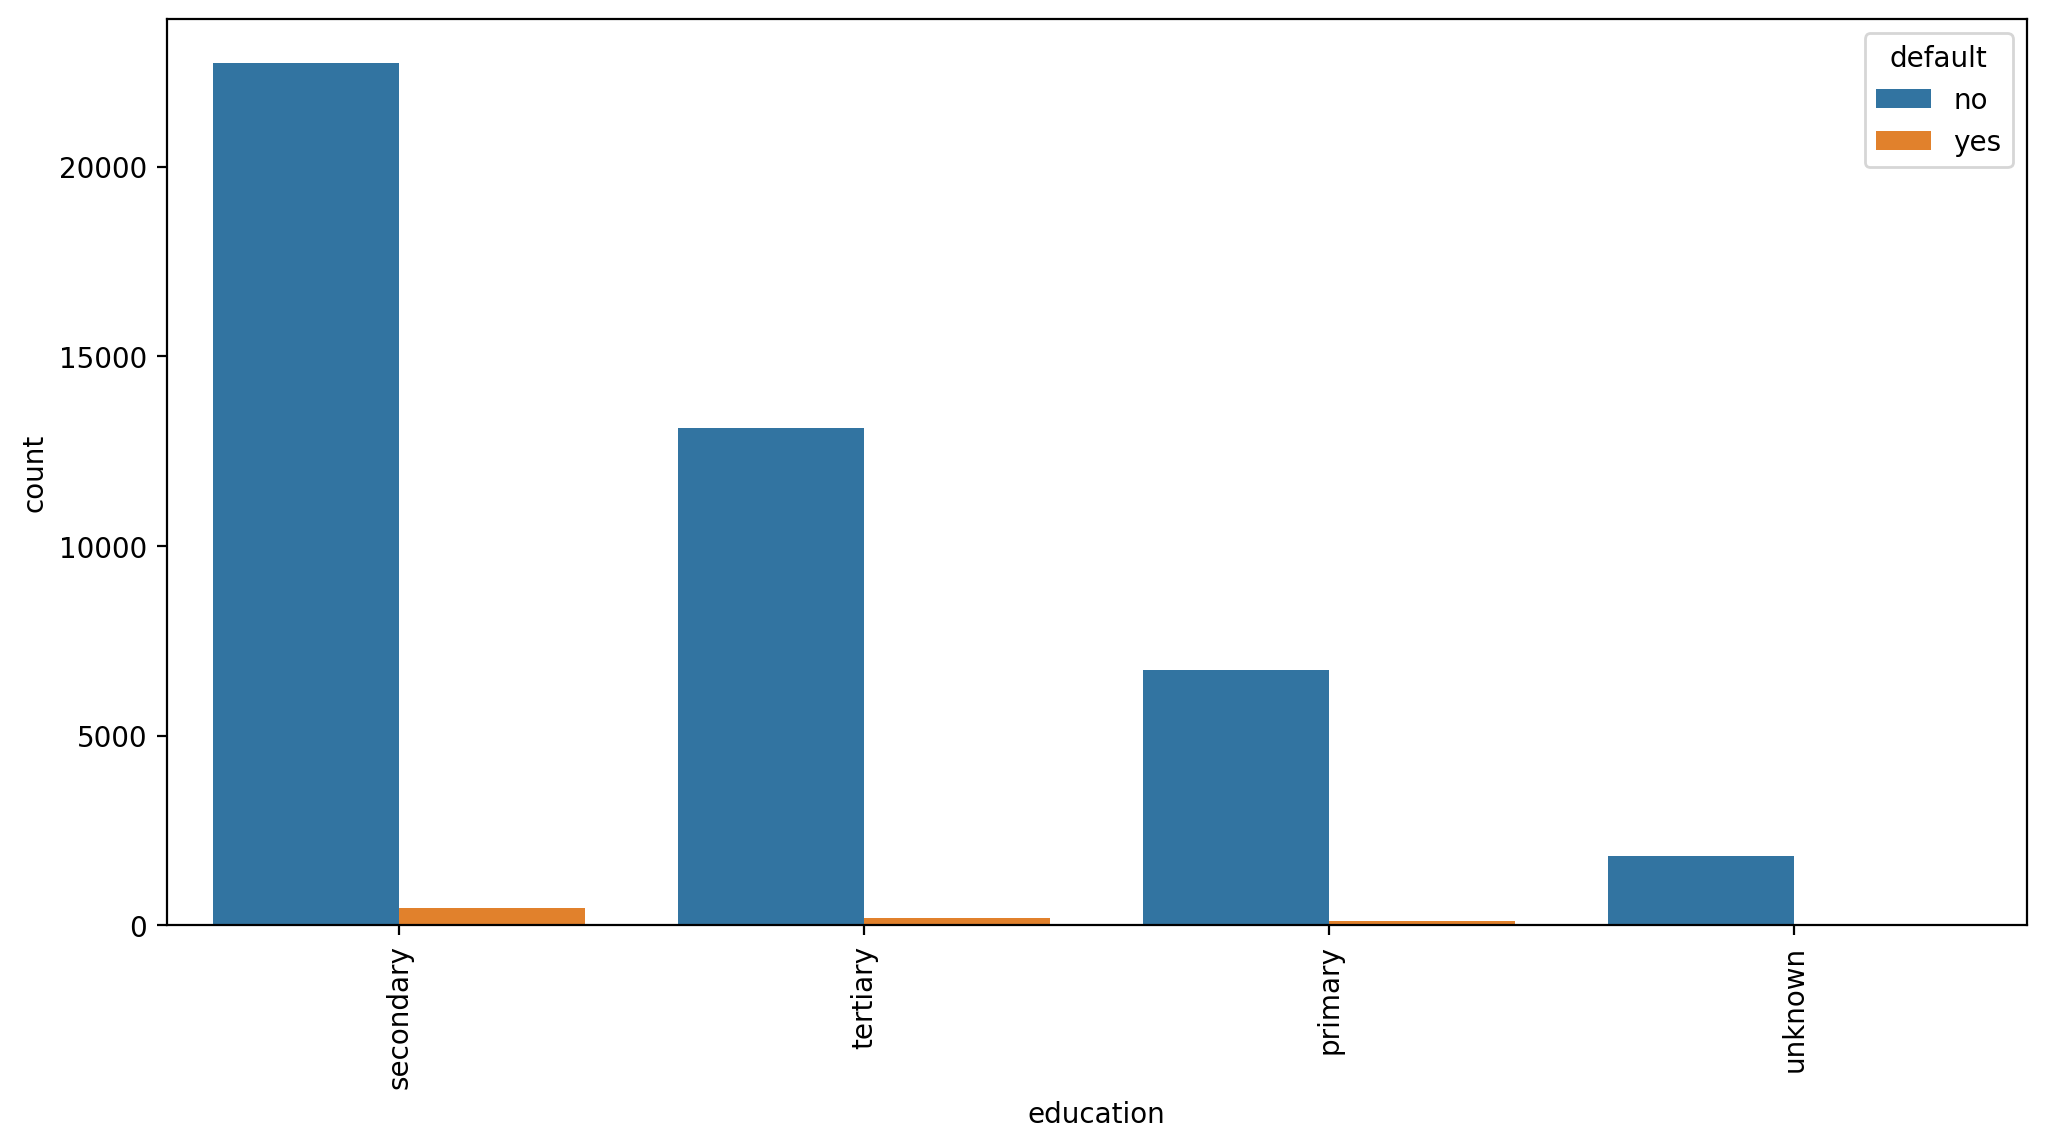

In [12]:
plt.figure(figsize = (12,6), dpi = 200)
#https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data = df, x = "education", order = df["education"].value_counts().index, hue = "default")
plt.xticks(rotation = 90);

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
X = pd.get_dummies(df)

In [15]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters = 3)

In [21]:
cluster_labels = model.fit_predict(scaled_X)

In [22]:
cluster_labels

array([1, 1, 1, ..., 0, 2, 0])

In [23]:
X["Cluster"] = cluster_labels

In [24]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes,Cluster
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,2
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,2
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,0,0,0,1,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,2


In [25]:
X["Cluster"].value_counts()

2    22029
1    14928
0     8254
Name: Cluster, dtype: int64

<AxesSubplot:>

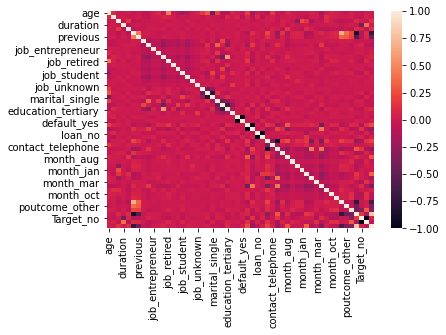

In [26]:
sns.heatmap(X.corr())

In [28]:
X.corr()["Cluster"]

age                    0.030866
balance                0.002629
day                    0.136041
duration               0.011144
campaign               0.111674
pdays                 -0.706448
previous              -0.432532
job_admin.            -0.037833
job_blue-collar       -0.095162
job_entrepreneur       0.014521
job_housemaid          0.034088
job_management         0.067462
job_retired            0.014579
job_self-employed      0.017432
job_services          -0.028090
job_student           -0.016914
job_technician         0.039355
job_unemployed         0.025759
job_unknown            0.008510
marital_divorced      -0.005334
marital_married        0.018225
marital_single        -0.016026
education_primary     -0.023825
education_secondary   -0.055709
education_tertiary     0.085655
education_unknown     -0.013322
default_no            -0.031447
default_yes            0.031447
housing_no             0.249225
housing_yes           -0.249225
loan_no               -0.040714
loan_yes

<AxesSubplot:>

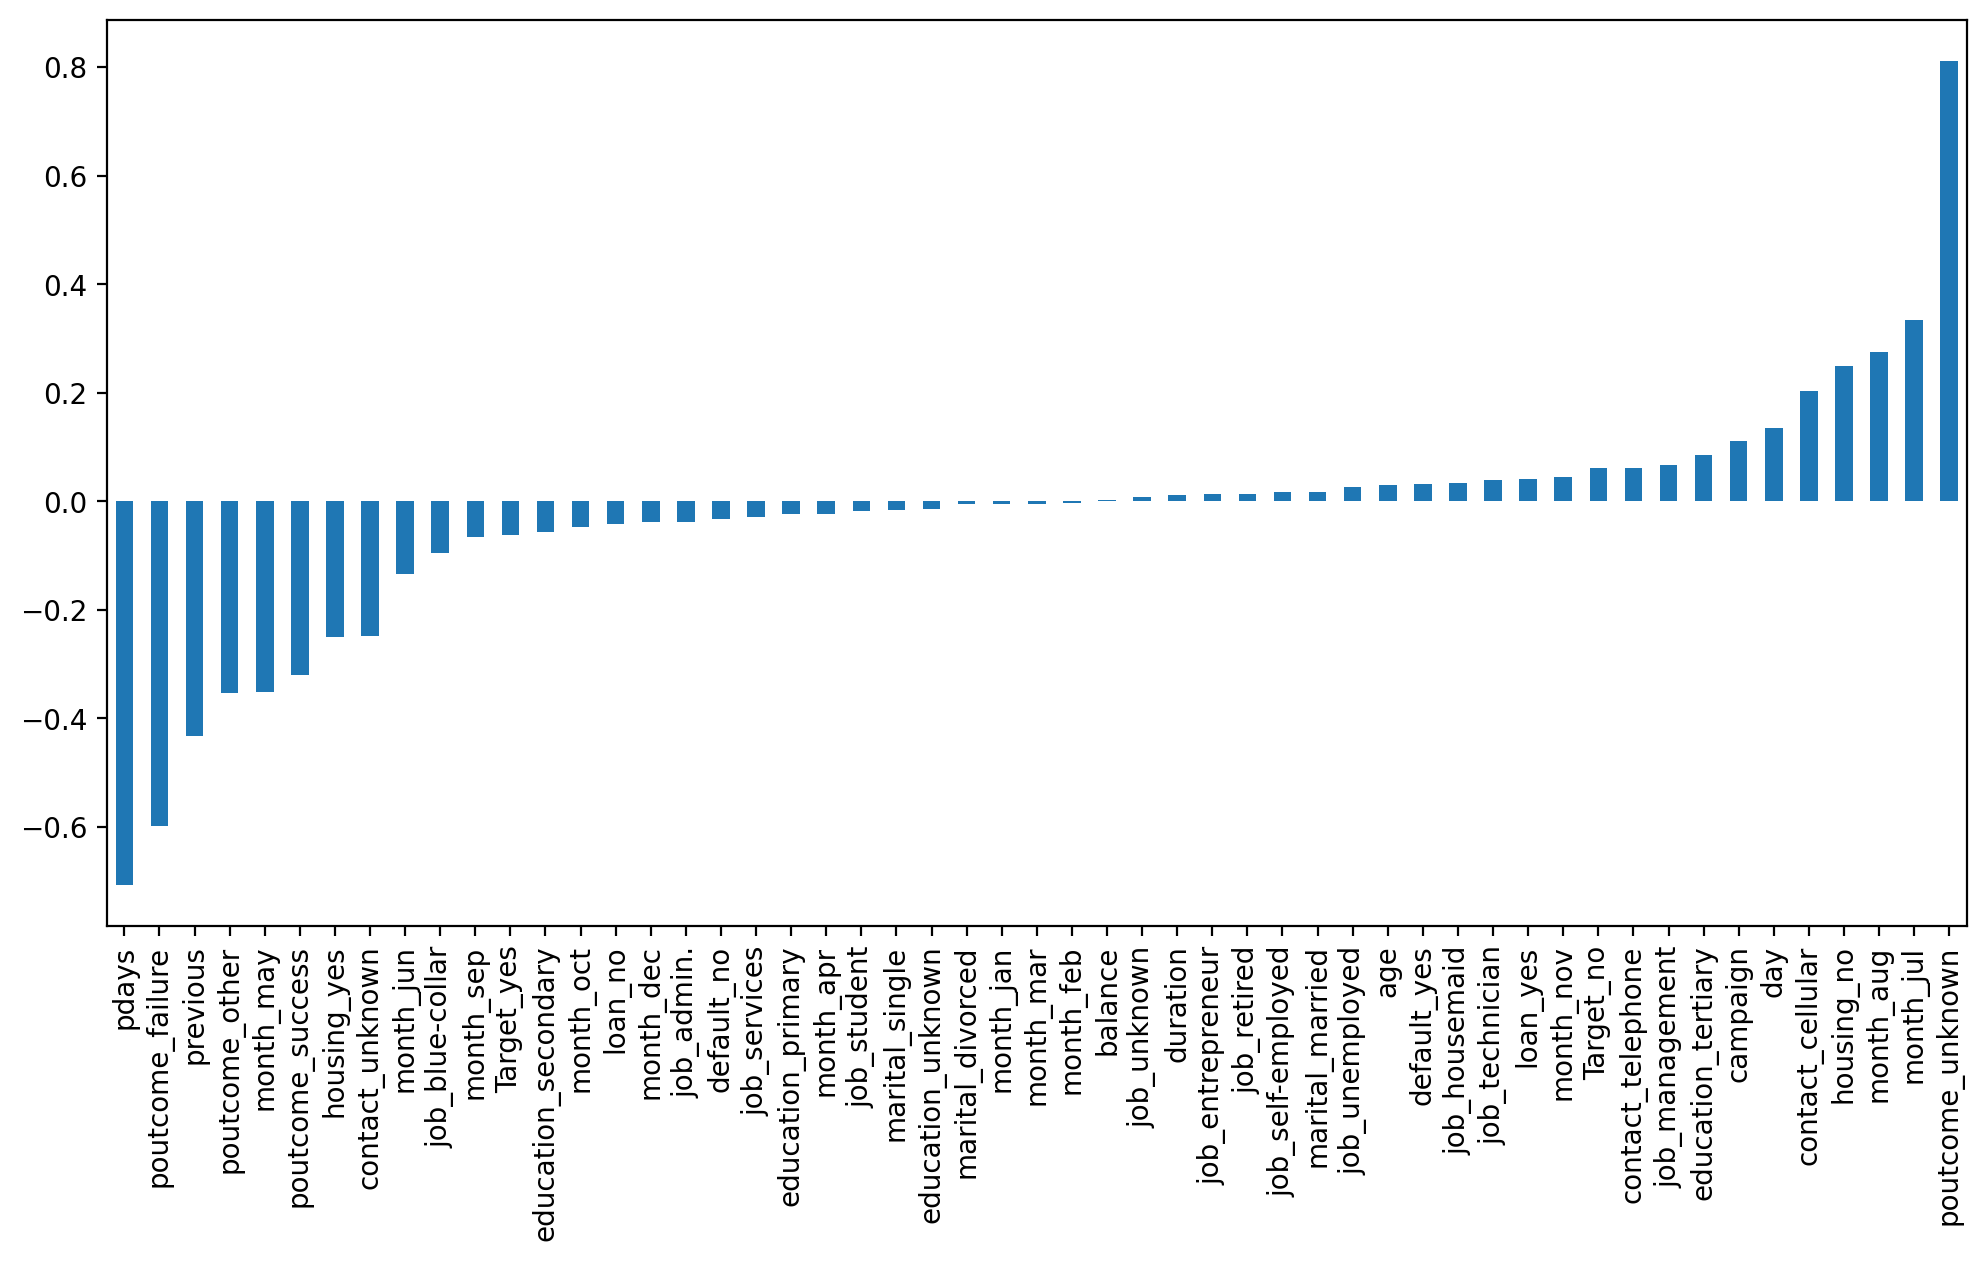

In [29]:
plt.figure(figsize=(12,6),dpi = 200)
X.corr()["Cluster"].iloc[:-1].sort_values().plot(kind = "bar")

In [30]:
ssd = []
for k in range (2, 10):
    model = KMeans(n_clusters = k)
    model.fit(scaled_X)
    #sum of squared distances of samples to their closest cluster center
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of squared distances')

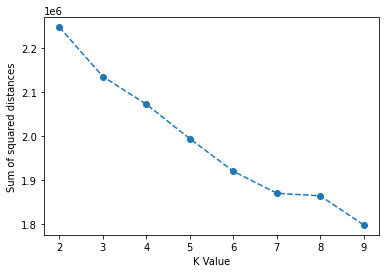

In [31]:
plt.plot(range(2,10), ssd, "o--")
plt.xlabel("K Value")
plt.ylabel("Sum of squared distances")